# Midterm Exam 💙 💛 

## Linear Regression

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import random


from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [15]:
df = load_diabetes(as_frame=True, scaled=False)
df = df['frame']

In [16]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0,135.0


In [17]:
X = df[['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']].values
y = df['target'].values

In [18]:
def predicted_y(weight, x, intercept):
    return weight@x + intercept
    
# linear loss
def loss(y, y_predicted):
    n = X.shape[0]
    s = ( y - y_predicted)**2
    return (1/n) * s

#derivative of loss w.r.t weight
def dldw(x, y, y_predicted):
    n = X.shape[0]
    s = -x * (y - y_predicted)
    return (2/n) * s
    

# derivative of loss w.r.t bias
def dldb(y,y_predicted):
    n =  X.shape[0]
    s = -(y - y_predicted)
    return (2/n) * s
       
# gradient function
def stochastic_gradient_descent(x,y):

    m = np.random.randn(x.shape[1])
    b = 0
    epoch = 2000
    learning_rate = 0.001
    
    n = len(x)
    linear_loss=[]
    
    for i in tqdm(range(epoch)):
        
        for j in range(n):
            random_index = random.randint(0,n-1)
            x_sample = x[random_index]
            y_sample = y[random_index]

            y_predicted = predicted_y(m ,x_sample, b)
         
            m = m - learning_rate * dldw(x_sample, y_sample, y_predicted) 
            b = b - learning_rate * dldb(y_sample, y_predicted)

        linear_loss.append(loss(y_sample, y_predicted))    
        
        
    plt.plot(np.arange(1, epoch), linear_loss[1:])
    plt.xlabel("number of epoch")
    plt.ylabel("loss")
    
    return m , b,

  0%|          | 0/2000 [00:00<?, ?it/s]

100%|██████████| 2000/2000 [00:08<00:00, 229.74it/s]


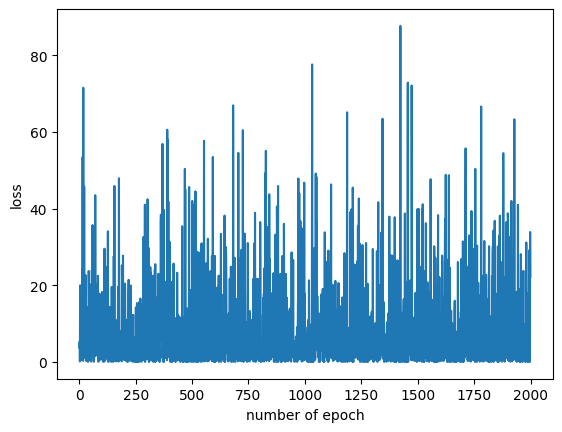

In [19]:
m,b = stochastic_gradient_descent(X, y)

In [20]:
print(m)
print(b)

[  0.05878555 -15.02173291   5.43583192   1.12334839   1.46523832
  -1.42077317  -3.02062321  -4.41623225   0.67980095   0.20885377]
-2.5050326002877115
